In [389]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lombaintelligooo/sample_submission.csv
/kaggle/input/lombaintelligooo/test_order_id.csv
/kaggle/input/lombaintelligooo/test/df_Orders.csv
/kaggle/input/lombaintelligooo/test/df_Customers.csv
/kaggle/input/lombaintelligooo/test/df_Products.csv
/kaggle/input/lombaintelligooo/test/df_Payments.csv
/kaggle/input/lombaintelligooo/test/df_OrderItems.csv
/kaggle/input/lombaintelligooo/train/df_Orders.csv
/kaggle/input/lombaintelligooo/train/df_Customers.csv
/kaggle/input/lombaintelligooo/train/df_Products.csv
/kaggle/input/lombaintelligooo/train/df_Payments.csv
/kaggle/input/lombaintelligooo/train/df_OrderItems.csv


In [390]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier# merge all the data train gradually
df_train = pd.merge(df_customers_train, df_orders_train, on='customer_id', how='inner')
df_train = pd.merge(df_train, df_payments_train, on='order_id', how='inner')
df_train = pd.merge(df_train, df_orderItems_train, on='order_id', how='inner')
df_train = pd.merge(df_train, df_products_train, on='product_id', how='inner')

# merge all the data test
df_test = pd.merge(df_customers_test, df_orders_test, on='customer_id', how='inner')
df_test = pd.merge(df_test, df_payments_test, on='order_id', how='inner')
df_test = pd.merge(df_test, df_orderItems_test, on='order_id', how='inner')
df_test = pd.merge(df_test, df_products_test, on='product_id', how='inner')

df_train.info()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_zip_code_prefix       int64  
 2   customer_city                  object 
 3   customer_state                 object 
 4   order_id                       object 
 5   order_status                   object 
 6   order_purchase_timestamp       object 
 7   order_approved_at              object 
 8   order_delivered_timestamp      object 
 9   order_estimated_delivery_date  object 
 10  payment_sequential             int64  
 11  payment_type                   object 
 12  payment_installments           int64  
 13  payment_value                  float64
 14  product_id                     object 
 15  seller_id                      object 
 16  price                          float64
 17  shipping_charges               float64
 18  pr

In [391]:
# Dataset Path
orderId = "/kaggle/input/lombaintelligooo/test_order_id.csv"

orders_test = "/kaggle/input/lombaintelligooo/test/df_Orders.csv"
customers_test = "/kaggle/input/lombaintelligooo/test/df_Customers.csv"
products_test = "/kaggle/input/lombaintelligooo/test/df_Products.csv"
payments_test = "/kaggle/input/lombaintelligooo/test/df_Payments.csv"
orderItems_test = "/kaggle/input/lombaintelligooo/test/df_OrderItems.csv"

orders_train = "/kaggle/input/lombaintelligooo/train/df_Orders.csv"
customers_train = "/kaggle/input/lombaintelligooo/train/df_Customers.csv"
products_train = "/kaggle/input/lombaintelligooo/train/df_Products.csv"
payments_train = "/kaggle/input/lombaintelligooo/train/df_Payments.csv"
orderItems_train = "/kaggle/input/lombaintelligooo/train/df_OrderItems.csv"

# Import dataset
df_orderId = pd.read_csv(orderId)

df_customers_train = pd.read_csv(customers_train)
df_orders_train = pd.read_csv(orders_train)
df_products_train = pd.read_csv(products_train)
df_payments_train = pd.read_csv(payments_train)
df_orderItems_train = pd.read_csv(orderItems_train)

df_customers_test = pd.read_csv(customers_test)
df_orders_test = pd.read_csv(orders_test)
df_products_test = pd.read_csv(products_test)
df_payments_test = pd.read_csv(payments_test)
df_orderItems_test = pd.read_csv(orderItems_test)

In [392]:
# merge all the data train gradually
df_train = pd.merge(df_customers_train, df_orders_train, on='customer_id', how='inner')
df_train = pd.merge(df_train, df_payments_train, on='order_id', how='inner')
df_train = pd.merge(df_train, df_orderItems_train, on='order_id', how='inner')
df_train = pd.merge(df_train, df_products_train, on='product_id', how='inner')

# merge all the data test
df_test = pd.merge(df_customers_test, df_orders_test, on='customer_id', how='inner')
df_test = pd.merge(df_test, df_payments_test, on='order_id', how='inner')
df_test = pd.merge(df_test, df_orderItems_test, on='order_id', how='inner')
df_test = pd.merge(df_test, df_products_test, on='product_id', how='inner')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_zip_code_prefix       int64  
 2   customer_city                  object 
 3   customer_state                 object 
 4   order_id                       object 
 5   order_status                   object 
 6   order_purchase_timestamp       object 
 7   order_approved_at              object 
 8   order_delivered_timestamp      object 
 9   order_estimated_delivery_date  object 
 10  payment_sequential             int64  
 11  payment_type                   object 
 12  payment_installments           int64  
 13  payment_value                  float64
 14  product_id                     object 
 15  seller_id                      object 
 16  price                          float64
 17  shipping_charges               float64
 18  pr

In [393]:
df_train['order_purchase_timestamp'] = pd.to_datetime(df_train['order_purchase_timestamp'])
df_train['order_delivered_timestamp'] = pd.to_datetime(df_train['order_delivered_timestamp'])
df_train['order_estimated_delivery_date'] = pd.to_datetime(df_train['order_estimated_delivery_date'])
df_train['is_late'] = (df_train['order_delivered_timestamp'] > df_train['order_estimated_delivery_date']).astype(int)

In [394]:
df_train['is_late'].value_counts()

is_late
0    2323459
1     206027
Name: count, dtype: int64

In [395]:
df_train.isna().sum()

customer_id                          0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  199
order_delivered_timestamp        36051
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
product_id                           0
seller_id                            0
price                                0
shipping_charges                     0
product_category_name             1408
product_weight_g                   197
product_length_cm                  197
product_height_cm                  197
product_width_cm                   197
is_late                              0
dtype: int64

# # # DATA CLEANING

In [396]:
def cleaningtrain(df):
    df['order_approved_at'].fillna(df['order_approved_at'].mode()[0], inplace=True)
    df['product_category_name'].fillna(df['product_category_name'].mode()[0], inplace=True)
    df['product_weight_g'].fillna(df['product_weight_g'].mean(), inplace=True)
    df['product_length_cm'].fillna(df['product_length_cm'].mean(), inplace=True)
    df['product_height_cm'].fillna(df['product_height_cm'].mean(), inplace=True)
    df['product_width_cm'].fillna(df['product_width_cm'].mean(), inplace=True)
    df['order_delivered_timestamp'].fillna(df['order_delivered_timestamp'].mode()[0], inplace=True)
    
cleaningtrain(df_train)
def cleaningtest(df):
    df['order_approved_at'].fillna(df['order_approved_at'].mode()[0], inplace=True)
    df['product_category_name'].fillna(df['product_category_name'].mode()[0], inplace=True)
    df['product_weight_g'].fillna(df['product_weight_g'].mean(), inplace=True)
    df['product_length_cm'].fillna(df['product_length_cm'].mean(), inplace=True)
    df['product_height_cm'].fillna(df['product_height_cm'].mean(), inplace=True)
    df['product_width_cm'].fillna(df['product_width_cm'].mean(), inplace=True)
    
    
cleaningtest(df_test)

In [397]:
df_train.isna().sum()

customer_id                      0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
is_late                          0
dtype: int64

In [398]:
df_test.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_purchase_timestamp    0
order_approved_at           0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
product_id                  0
seller_id                   0
price                       0
shipping_charges            0
product_category_name       0
product_weight_g            0
product_length_cm           0
product_height_cm           0
product_width_cm            0
dtype: int64

In [399]:
duplicate_values = df_train['order_id'].duplicated()
print(duplicate_values)

df_train = df_train.drop_duplicates(subset=['order_id'], keep='first')
print(df_train)
duplicate_values_test = df_test['order_id'].duplicated()
print(duplicate_values_test)

df_test = df_test.drop_duplicates(subset=['order_id'], keep='first')
print(df_test)

0          False
1           True
2           True
3           True
4           True
           ...  
2529481    False
2529482    False
2529483    False
2529484    False
2529485    False
Name: order_id, Length: 2529486, dtype: bool
          customer_id  customer_zip_code_prefix    customer_city  \
0        hCT0x9JiGXBQ                     58125  varzea paulista   
13       TuHMZO7ZH7mZ                     17515   rio de janeiro   
26       UNYaurBkHxer                     40286        aracatuba   
39       olvLB3sqg4YE                     88130       araraquara   
52       HvaudPydAHuQ                      2976           cuiaba   
...               ...                       ...              ...   
2529481  BqRGM472ahYC                      1026        sao paulo   
2529482  31lUTcScwAaf                      1256   rio de janeiro   
2529483  cuARwGvabbtw                     87070      carapicuiba   
2529484  bfJtzkBGksdY                     94060           amparo   
2529485  rhevVNXYJnE

In [400]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89316 entries, 0 to 2529485
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    89316 non-null  object        
 1   customer_zip_code_prefix       89316 non-null  int64         
 2   customer_city                  89316 non-null  object        
 3   customer_state                 89316 non-null  object        
 4   order_id                       89316 non-null  object        
 5   order_status                   89316 non-null  object        
 6   order_purchase_timestamp       89316 non-null  datetime64[ns]
 7   order_approved_at              89316 non-null  object        
 8   order_delivered_timestamp      89316 non-null  datetime64[ns]
 9   order_estimated_delivery_date  89316 non-null  datetime64[ns]
 10  payment_sequential             89316 non-null  int64         
 11  payment_type      

In [401]:
feature_train_used = ['customer_zip_code_prefix',  'order_purchase_timestamp','order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'seller_id', 'price', 'shipping_charges', 'product_category_name','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
label = df_train.iloc[:, -1]

feature_test_used = ['customer_zip_code_prefix', 'order_purchase_timestamp', 'order_approved_at', 'seller_id', 'price', 'shipping_charges', 'product_category_name','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

In [402]:
## encoding order_id, seller ID,product category
feature_train = df_train[feature_train_used]

### order_id
df_train_order_id = df_train['order_id'].tolist()
encodeOrderID = []
for order_id in df_train_order_id:
        OrderID = order_id.encode("utf-8")
        intOrderID = int.from_bytes(OrderID, byteorder = 'big')
        encodeOrderID.append(intOrderID)
    
df_order_id = pd.Series(encodeOrderID, name = "order_id")
feature_train.reset_index(drop=True, inplace = True)
df_train_fit = pd.concat([df_order_id, feature_train], axis = 1)

### seller_id
df_train_seller_id = df_train['seller_id'].tolist()
encodeSellerID = []
for seller_id in df_train_seller_id:
        SellerID = seller_id.encode("utf-8")
        intSellerID = int.from_bytes(SellerID, byteorder = 'big')
        encodeSellerID.append(intSellerID)
    
df_seller_id = pd.Series(encodeSellerID, name = "seller_id_encode")
df_train_fit = pd.concat([df_train_fit, df_seller_id], axis = 1)

### product_category
df_train_product_cat = df_train['product_category_name'].tolist()
encodeProductCat = []
for product_category_name in df_train_product_cat:
        ProductCat = product_category_name.encode("utf-8")
        intProductCat = int.from_bytes(ProductCat, byteorder = 'big')
        encodeProductCat.append(intProductCat)
    
df_product_cat = pd.Series(encodeProductCat, name = "product_category_name_encode")
df_train_fit = pd.concat([df_train_fit, df_product_cat], axis = 1)
df_train_fit.head()

,order_id,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id_encode,product_category_name_encode
0,20262080653723727547690142059,58125,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,ZWM05J9LcBSF,223.51,84.65,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
1,37570328152849302723817980502,17515,2017-10-23 17:07:40,2017-10-25 02:28:33,2017-11-03 19:03:52,2017-11-09,ZWM05J9LcBSF,223.51,48.35,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
2,22361866633790296596553427531,40286,2017-10-29 11:01:06,2017-10-29 11:45:36,2017-11-03 20:27:46,2017-11-17,ZWM05J9LcBSF,223.51,84.65,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
3,22119027611183145645427028844,88130,2017-10-23 16:26:56,2017-10-23 16:46:25,2017-10-26 20:47:57,2017-11-09,ZWM05J9LcBSF,223.51,84.65,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
4,37270433385361387523364711492,2976,2017-10-26 16:52:36,2017-10-26 17:32:23,2017-11-06 19:46:41,2017-11-23,ZWM05J9LcBSF,223.51,45.50,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643


In [403]:
feature_test = df_test[feature_test_used]

### order_id
df_test_order_id = df_test['order_id'].tolist()
encodeOrderID_test = []
for order_id in df_test_order_id:
        OrderID_test = order_id.encode("utf-8")
        intOrderID_test = int.from_bytes(OrderID_test, byteorder = 'big')
        encodeOrderID_test.append(intOrderID_test)
    
df_order_id_test = pd.Series(encodeOrderID_test, name = "order_id")
feature_test.reset_index(drop=True, inplace = True)
df_test_fit = pd.concat([df_order_id_test, feature_test], axis = 1)

### seller_id
df_test_seller_id = df_test['seller_id'].tolist()
encodeSellerID_test = []
for seller_id in df_test_seller_id:
        SellerID_test = seller_id.encode("utf-8")
        intSellerID_test = int.from_bytes(SellerID_test, byteorder = 'big')
        encodeSellerID_test.append(intSellerID_test)
    
df_seller_id_test = pd.Series(encodeSellerID_test, name = "seller_id_encode")
df_test_fit = pd.concat([df_test_fit, df_seller_id_test], axis = 1)

### product_category
df_test_product_cat = df_test['product_category_name'].tolist()
encodeProductCat_test = []
for product_category_name in df_test_product_cat:
        ProductCat_test = product_category_name.encode("utf-8")
        intProductCat_test = int.from_bytes(ProductCat_test, byteorder = 'big')
        encodeProductCat_test.append(intProductCat_test)
    
df_product_cat_test = pd.Series(encodeProductCat_test, name = "product_category_name_encode")
df_test_fit = pd.concat([df_test_fit, df_product_cat_test], axis = 1)
df_test_fit.head()

,order_id,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id_encode,product_category_name_encode
0,36275567974446723593300044135,6020,2017-11-18 12:29:57,2017-11-18 12:46:08,3jwvL6ihC45G,24.10,20.90,toys,50.0,16.0,5.0,11.0,15912445781586704075140117831,1953462643
1,26993161101754891655708297544,18602,2018-04-05 14:54:54,2018-04-05 15:10:01,3jwvL6ihC45G,24.10,34.33,toys,50.0,16.0,5.0,11.0,15912445781586704075140117831,1953462643
2,25754324236240103130142230337,21550,2018-08-18 21:48:53,2018-08-21 05:00:15,3jwvL6ihC45G,153.75,34.33,toys,50.0,16.0,5.0,11.0,15912445781586704075140117831,1953462643
3,34478985706408456143253287225,23020,2018-06-02 17:13:12,2018-06-02 20:12:23,GlLj704QXlDB,42.89,12.28,electronics,200.0,21.0,7.0,14.0,22104360545018185731525067842,122613393648857642965754739
4,32274958556736860610943406197,40110,2018-05-18 15:43:20,2018-05-19 12:31:41,GlLj704QXlDB,42.89,6.87,electronics,200.0,21.0,7.0,14.0,22104360545018185731525067842,122613393648857642965754739


In [404]:
# encode date

columns_to_convert_train = ['order_purchase_timestamp', 'order_approved_at','order_delivered_timestamp', 'order_estimated_delivery_date']
columns_to_convert_test = ['order_purchase_timestamp', 'order_approved_at']

# Ubah kolom tanggal dan waktu menjadi tipe data datetime
df_train_fit['order_purchase_timestamp'] = pd.to_datetime(df_train_fit['order_purchase_timestamp'])
df_train_fit['order_approved_at'] = pd.to_datetime(df_train_fit['order_approved_at'])
df_train_fit['order_delivered_timestamp'] = pd.to_datetime(df_train_fit['order_delivered_timestamp'])
df_train_fit['order_estimated_delivery_date'] = pd.to_datetime(df_train_fit['order_estimated_delivery_date'])

df_test_fit['order_purchase_timestamp'] = pd.to_datetime(df_test_fit['order_purchase_timestamp'])
df_test_fit['order_approved_at'] = pd.to_datetime(df_test_fit['order_approved_at'])

# Konversi kolom tipe data datetime menjadi Unix timestamps
df_train_fit[columns_to_convert_train] = (df_train_fit[columns_to_convert_train] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)
df_test_fit[columns_to_convert_test] = (df_test_fit[columns_to_convert_test] - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)


In [405]:
df_train_fit.head()

,order_id,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id_encode,product_category_name_encode
0,20262080653723727547690142059,58125,1508698674,1508699653,1509056392,1510185600,ZWM05J9LcBSF,223.51,84.65,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
1,37570328152849302723817980502,17515,1508778460,1508898513,1509735832,1510185600,ZWM05J9LcBSF,223.51,48.35,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
2,22361866633790296596553427531,40286,1509274866,1509277536,1509740866,1510876800,ZWM05J9LcBSF,223.51,84.65,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
3,22119027611183145645427028844,88130,1508776016,1508777185,1509050877,1510185600,ZWM05J9LcBSF,223.51,84.65,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
4,37270433385361387523364711492,2976,1509036756,1509039143,1509997601,1511395200,ZWM05J9LcBSF,223.51,45.50,toys,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643


In [406]:
df_test_fit.head()

,order_id,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id_encode,product_category_name_encode
0,36275567974446723593300044135,6020,1511008197,1511009168,3jwvL6ihC45G,24.10,20.90,toys,50.0,16.0,5.0,11.0,15912445781586704075140117831,1953462643
1,26993161101754891655708297544,18602,1522940094,1522941001,3jwvL6ihC45G,24.10,34.33,toys,50.0,16.0,5.0,11.0,15912445781586704075140117831,1953462643
2,25754324236240103130142230337,21550,1534628933,1534827615,3jwvL6ihC45G,153.75,34.33,toys,50.0,16.0,5.0,11.0,15912445781586704075140117831,1953462643
3,34478985706408456143253287225,23020,1527959592,1527970343,GlLj704QXlDB,42.89,12.28,electronics,200.0,21.0,7.0,14.0,22104360545018185731525067842,122613393648857642965754739
4,32274958556736860610943406197,40110,1526658200,1526733101,GlLj704QXlDB,42.89,6.87,electronics,200.0,21.0,7.0,14.0,22104360545018185731525067842,122613393648857642965754739


In [407]:
## drop seller id and product_category_name column
df_train_clean = pd.DataFrame(df_train_fit).drop(['seller_id', 'product_category_name', 'price', 'order_delivered_timestamp', 'order_estimated_delivery_date'], axis = 1)
df_test_clean = pd.DataFrame(df_test_fit).drop(['seller_id', 'product_category_name','price'], axis = 1)

In [408]:
df_train['is_late'].value_counts()

is_late
0    82578
1     6738
Name: count, dtype: int64

In [409]:
a = df_train['is_late']
a.reset_index(drop=True, inplace = True)
a.head()
a.value_counts()

is_late
0    82578
1     6738
Name: count, dtype: int64

In [410]:
df_train_coba = pd.concat([a,df_train_clean], axis=1)
a = a.astype(int)
df_train_coba.head()
df_train_coba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_late                       89316 non-null  int64  
 1   order_id                      89316 non-null  object 
 2   customer_zip_code_prefix      89316 non-null  int64  
 3   order_purchase_timestamp      89316 non-null  int64  
 4   order_approved_at             89316 non-null  int64  
 5   shipping_charges              89316 non-null  float64
 6   product_weight_g              89316 non-null  float64
 7   product_length_cm             89316 non-null  float64
 8   product_height_cm             89316 non-null  float64
 9   product_width_cm              89316 non-null  float64
 10  seller_id_encode              89316 non-null  object 
 11  product_category_name_encode  89316 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 8.2+ MB


In [411]:
df_train_coba['is_late'].value_counts()

is_late
0    82578
1     6738
Name: count, dtype: int64

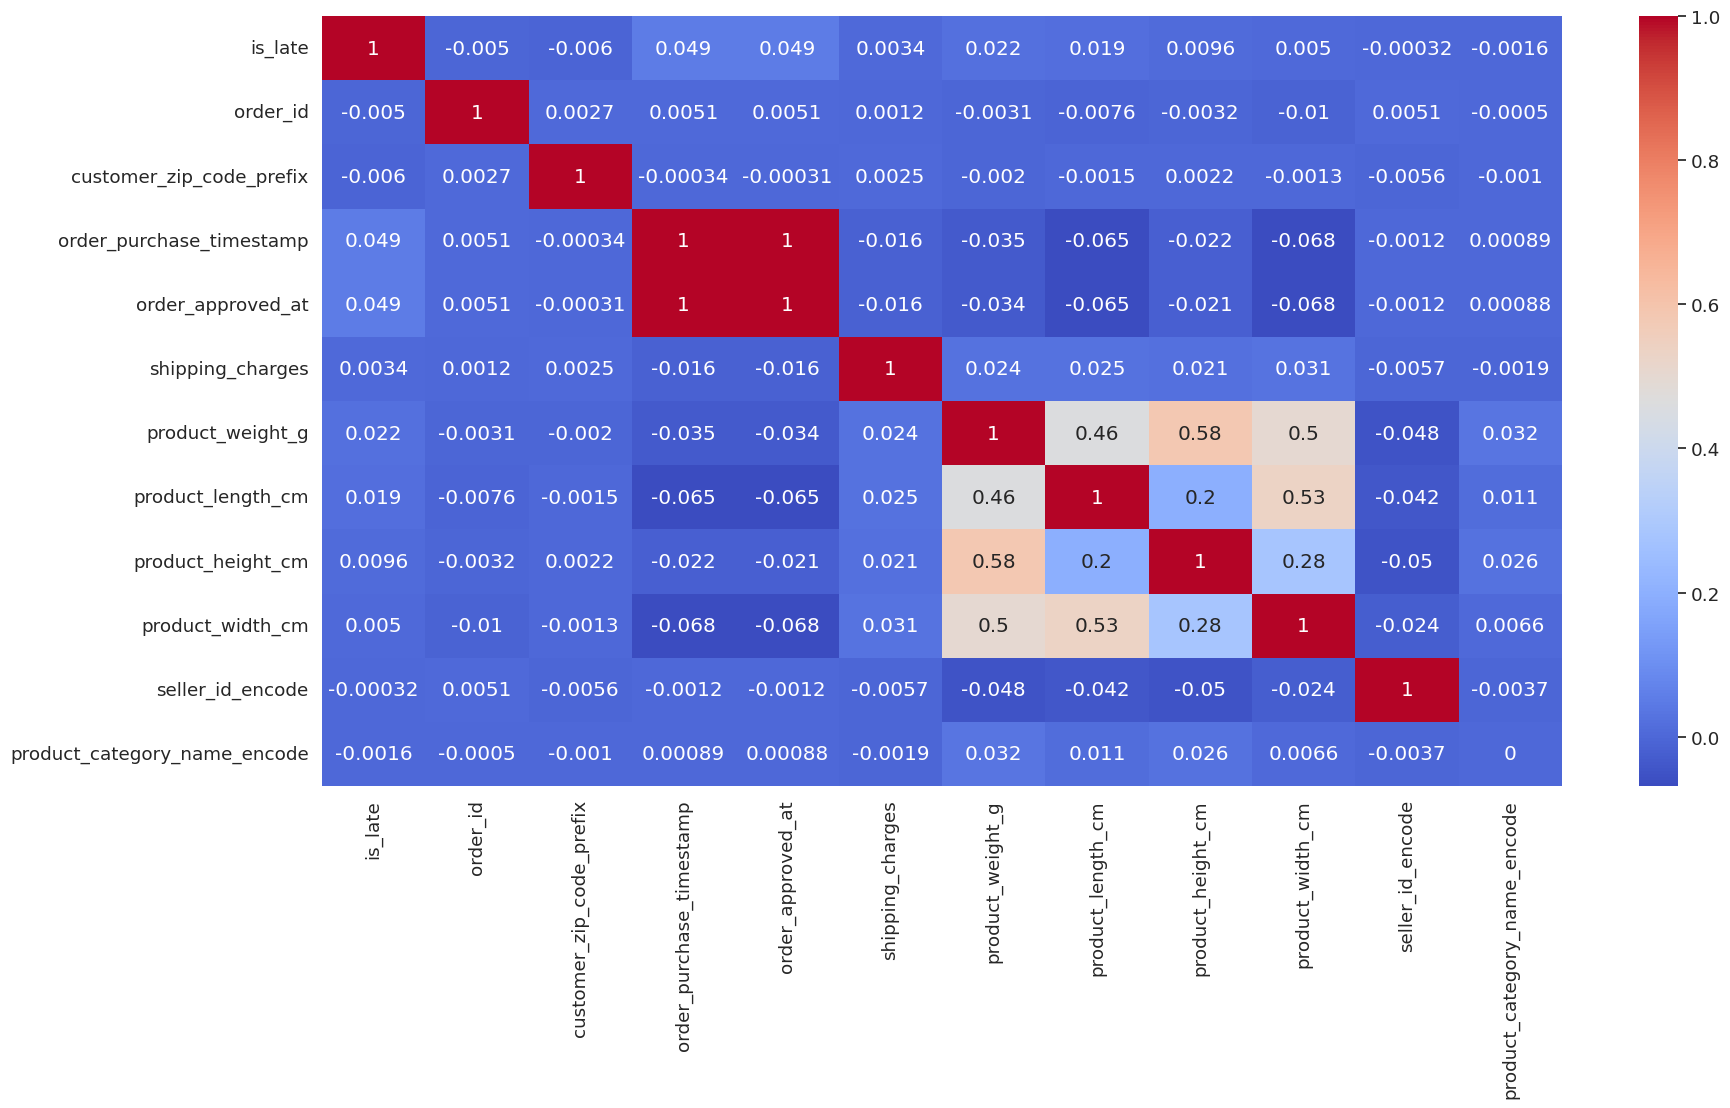

In [412]:
# Compute the correlation matrix for feature used only
corr_mat = df_train_coba.corr()

# Set the font scale for the heatmap
sns.set(font_scale=1.2)

# Create a larger figure for the heatmap
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

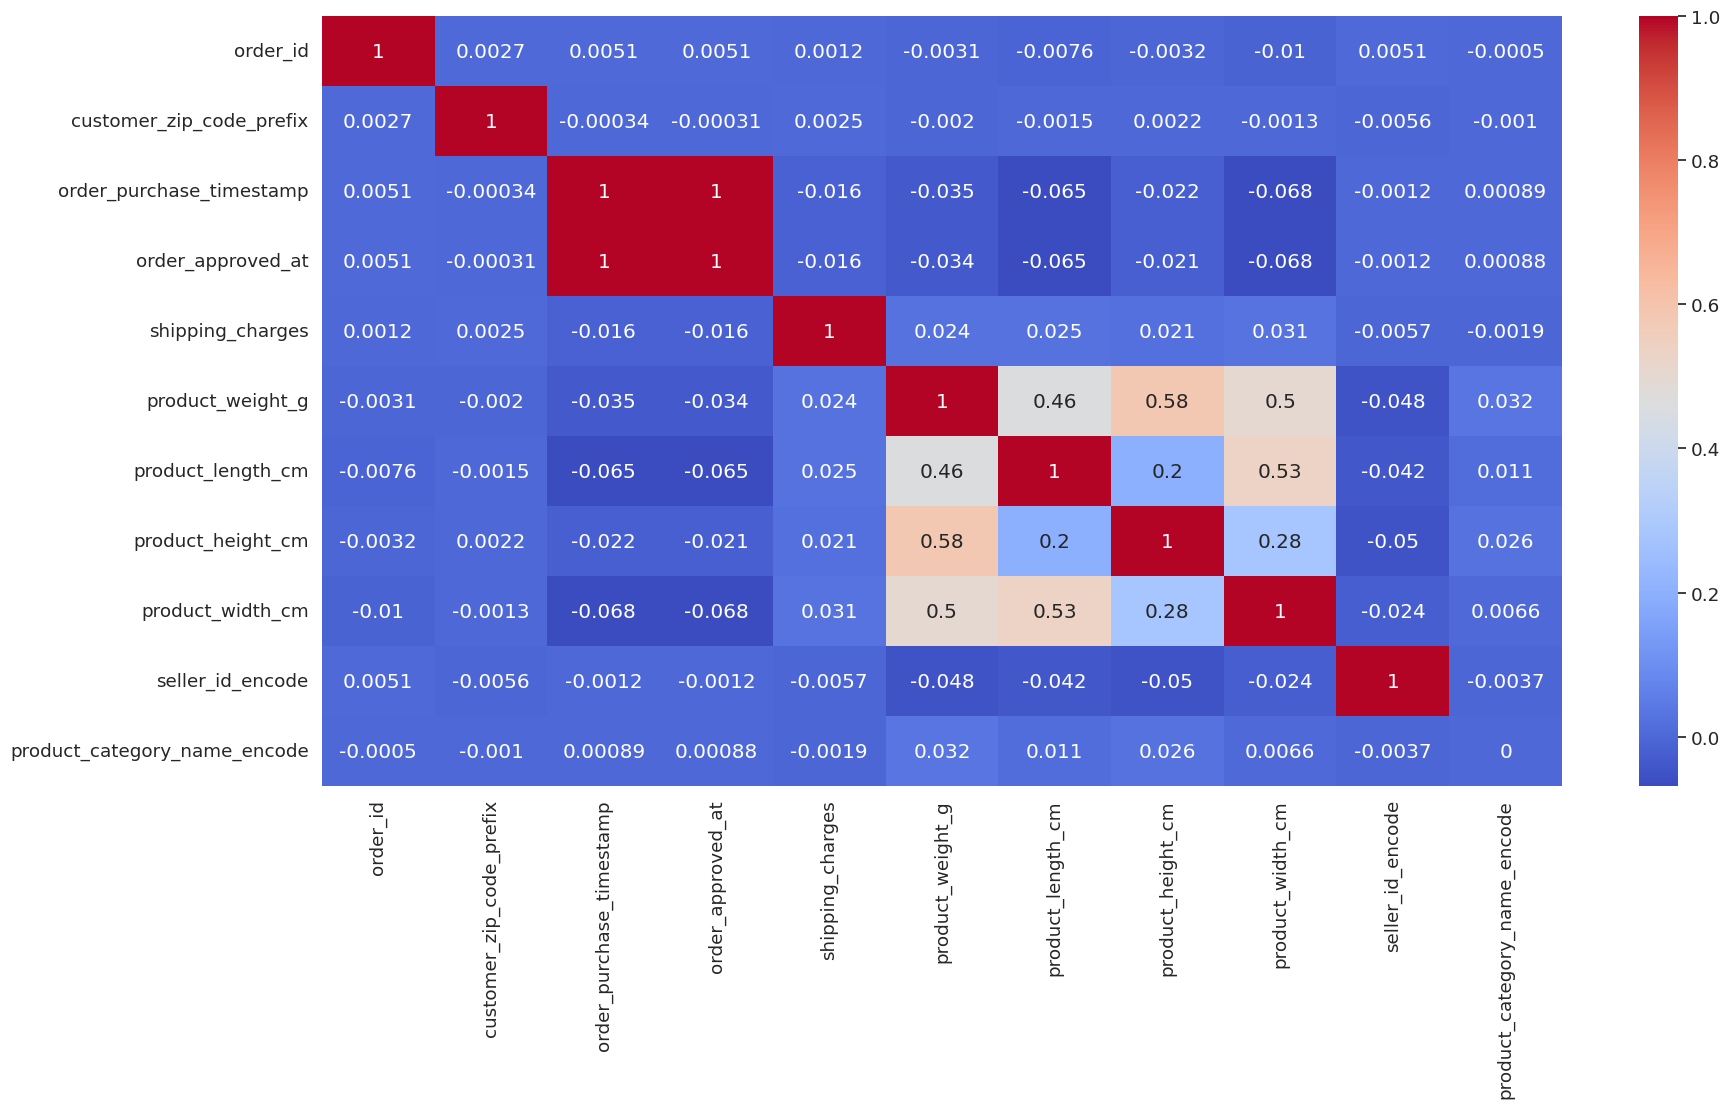

In [413]:
# Compute the correlation matrix for feature used only
corr_mat = df_train_clean.corr()

# Set the font scale for the heatmap
sns.set(font_scale=1.2)

# Create a larger figure for the heatmap
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

In [414]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      89316 non-null  object 
 1   customer_zip_code_prefix      89316 non-null  int64  
 2   order_purchase_timestamp      89316 non-null  int64  
 3   order_approved_at             89316 non-null  int64  
 4   shipping_charges              89316 non-null  float64
 5   product_weight_g              89316 non-null  float64
 6   product_length_cm             89316 non-null  float64
 7   product_height_cm             89316 non-null  float64
 8   product_width_cm              89316 non-null  float64
 9   seller_id_encode              89316 non-null  object 
 10  product_category_name_encode  89316 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 7.5+ MB


In [415]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      38279 non-null  object 
 1   customer_zip_code_prefix      38279 non-null  int64  
 2   order_purchase_timestamp      38279 non-null  int64  
 3   order_approved_at             38279 non-null  int64  
 4   shipping_charges              38279 non-null  float64
 5   product_weight_g              38279 non-null  float64
 6   product_length_cm             38279 non-null  float64
 7   product_height_cm             38279 non-null  float64
 8   product_width_cm              38279 non-null  float64
 9   seller_id_encode              38279 non-null  object 
 10  product_category_name_encode  38279 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 3.2+ MB


In [416]:
df_train_clean.head()

,order_id,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id_encode,product_category_name_encode
0,20262080653723727547690142059,58125,1508698674,1508699653,84.65,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
1,37570328152849302723817980502,17515,1508778460,1508898513,48.35,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
2,22361866633790296596553427531,40286,1509274866,1509277536,84.65,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
3,22119027611183145645427028844,88130,1508776016,1508777185,84.65,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
4,37270433385361387523364711492,2976,1509036756,1509039143,45.50,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643


In [417]:
df_train_clean.head()

,order_id,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id_encode,product_category_name_encode
0,20262080653723727547690142059,58125,1508698674,1508699653,84.65,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
1,37570328152849302723817980502,17515,1508778460,1508898513,48.35,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
2,22361866633790296596553427531,40286,1509274866,1509277536,84.65,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
3,22119027611183145645427028844,88130,1508776016,1508777185,84.65,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643
4,37270433385361387523364711492,2976,1509036756,1509039143,45.50,491.0,19.0,12.0,16.0,27959191941730370056702022470,1953462643


In [418]:
## drop seller id and product_category_name column
df_train_clean = pd.DataFrame(df_train_clean).drop(['product_category_name_encode'], axis = 1)
df_test_clean = pd.DataFrame(df_test_clean).drop(['product_category_name_encode'], axis = 1)

In [419]:
label.reset_index(drop=True, inplace = True)
label.head()

0    0
1    0
2    0
3    0
4    0
Name: is_late, dtype: int64

## # # MODELLIING

In [420]:
y = label
X = df_train_clean 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [421]:
np.isnan(X_val.any())

order_id                    False
customer_zip_code_prefix    False
order_purchase_timestamp    False
order_approved_at           False
shipping_charges            False
product_weight_g            False
product_length_cm           False
product_height_cm           False
product_width_cm            False
seller_id_encode            False
dtype: bool

In [422]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest initial Performance:
----------------------------------
Accuracy        :  0.9307706661690613
F1 Score        :  0.23378769103676167
Precision       :  0.8927444794952681
Recall          :  0.13450570342205323
Confusion Matrix:
  [[24657    34]
 [ 1821   283]]


In [428]:
rfm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

rfm_grid = RandomizedSearchCV(RandomForestClassifier(),
                        rfm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [ ]:
rfm_grid.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
rfm_grid.best_params_

In [ ]:
rfm_grid.best_estimator_

In [ ]:
rfm_grid = RandomForestClassifier(n_estimators=5000,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True) #default parameters
rfm_grid.fit(X_train,y_train)
rfm_grid_pred = rfm_grid.predict(X_val)

print('Random Forest Tuned Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_grid_pred))

In [423]:
rf_predict=rfm.predict(df_test_clean)

In [424]:
X_test_decode = []
for int_order_id in df_test_clean['order_id']:
    bytes_order_id = int_order_id.to_bytes((int_order_id.bit_length() + 7) // 8, byteorder="big")
    decoded_order_id = bytes_order_id.decode("utf-8")
    X_test_decode.append(decoded_order_id)

# Buat kolom baru dalam DataFrame df_test_fit
df_test_clean['order_id'] = X_test_decode

In [425]:
output_bestcat = pd.DataFrame({'order_id': df_test_clean['order_id'].values, 'is_late': rf_predict})
output_bestcat.to_csv('my_submission_randomforest.csv', index=False)
print("Submission saved")

Submission saved


In [427]:
output_bestcat['is_late'].value_counts()

is_late
0    37817
1      462
Name: count, dtype: int64